In [1]:
%matplotlib inline
from datascience import *
import numpy as np
import matplotlib.pyplot as plt

## A look at CA energy data
In California, energy and environmental policy initiatives are driving electric grid changes. Key initiatives
include the following:
<li>33 percent of retail electricity from renewable power by 2020, and 50% renewable by 2030; <li>greenhouse gas emissions reduction goal to 1990 levels by 2020;<li>regulations in the next 4-9 years requiring power plants that use coastal water for cooling to either repower, retrofit or retire; <li>policies to increase distributed generation; and <li>an executive order for 1.5 million zero emission vehicles by 2025.

Sources: https://www.caiso.com/Documents/FlexibleResourcesHelpRenewables_FastFacts.pdf
    http://www.energy.ca.gov/renewables/tracking_progress/documents/renewable.pdf

These initiatives are great, but can provide some real challenges when it comes to implementation. Why?
1. For the grid to function correctly, the energy supplied must exactly equal the energy demand at all times. If energy generation does not equal demand, the grid can have failures and blackouts. 
2. Over generation is as bad as under generation. 
3. The grid does not deal well with large/rapid fluctuations in energy usage

Accurate predictions of demand and prediction of generation from renewable sources is crucial to stabilizing the grid. We have provided data on hourly energy demand for the state of California as well as solar and wind energy generation for the state for the month of March 2016 from [CA ISO](http://oasis.caiso.com/). We have also provided Electric Vehicle (EV) charging data. The EV_sim table includes a week of simulated EV charging data from 2,220 EVs. 

In this minilab we will explore the energy and EV datasets, and will explore some of the challenges with reaching the initiatives.


In [2]:
ca_energy_demand = Table.read_table('March2016_CA_energy_demand.csv')
solar = Table.read_table('March2016_CA_gen_solar.csv')
wind = Table.read_table('March2016_CA_gen_wind.csv')
EV_sim = Table.read_table('EV_charge_data.csv')

## Part 1 - visualizing a week of data
**Tasks:**
<li> Plot energy demand ('MW') vs. 'INDEX' for the first week of March (hint you can use tables.take() to take only certain rows) <li> Plot solar energy generation ('MW') vs. 'INDEX' for the first week of March  <li> Plot wind energy generation ('MW') vs. 'INDEX' for the first week of March <li> Plot the week of EV data.

**Questions:** 
<li> What's the min/max energy used per hour in this week? <li> Is more energy used on weekends or weekdays? <li> What's the min/max solar power produced per hour in this week? <li> Which day appears to be least sunny? What's the max solar power produced on this day? <li> What's the min/max wind power produced per hour in this week? <li> What is the maximum power used per hour for charging the 2,220 EVs? <li> What is the average weekly energy requirement per car? Remember that the EV_sim table is aggregating 2,220 EV users. <li> How does this compare to the average energy consumption of other appliances, say a fridge for example? (you probably have to look this up) 

41.37 kWh used in a week. 0.25 kW = average power


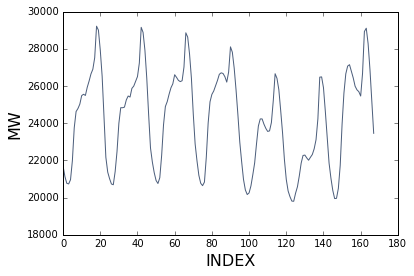

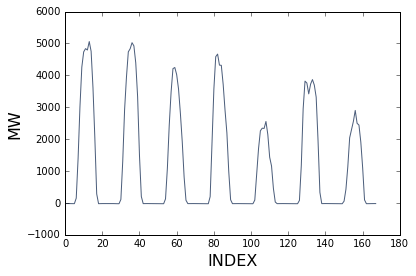

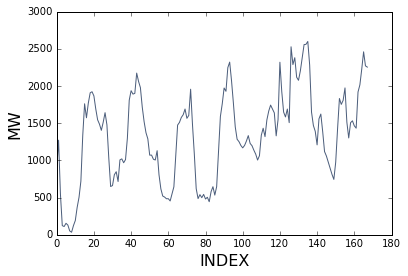

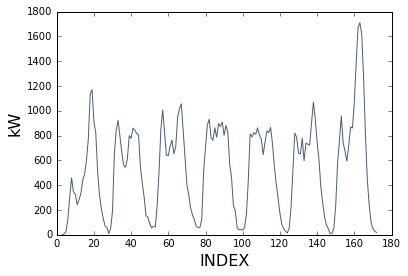

In [3]:
# Your code here

# Answer key:
ca_energy_demand.take(range(24*7)).plot('INDEX', 'MW')
solar.take(range(24*7)).plot('INDEX', 'MW')
wind.take(range(24*7)).plot('INDEX', 'MW')

EV_sim.plot('INDEX', 'kW')
week_kwh = np.sum(EV_sim.column('kW'))/2220

week_kw = week_kwh/(24*7)
print ('{0:.2f} kWh used in a week. {1:.2f} kW = average power'.format(week_kwh, week_kw))

In [4]:
# Answer questions here!
# Is more energy used on weekends or weekdays?
# weekdays
# What's the min/max solar power produced per hour in this week?
# 0,5000
# Which day appears to be least sunny? What's the max solar power produced on this day?
# Saturday, 2600
# What's the min/max wind power produced per hour in this week?
# 30, 2600
# What is the maximum power used per hour for charging the 2,220 EVs?
# 1700 kWs.
# What is the average weekly energy requirement per car? Remember that the EV_sim table is aggregating 2,220 EV users.
# On average 41.37 kWh used in a week. 0.25 kW = average power
# How does this compare to the average power consumption of other appliances, 
# say a fridge for example? (you probably have to look this up)
# New Fridge = 34.5 kWh per month. EV uses about 4-5 times as much as a new fridge. Similar to an old fridge.

## Plot mean hourly solar and wind energy generation, mean hourly energy demand, and mean hourly EV energy demand
**Tasks**<li> For each of solar, wind, and ca_energy_demand, **group** by hour and save the average energy consumption/generation per hour (np.mean). Save the results as solar_avg_byhour, wind_avg_by_hour, and demand_avg_byhour. <li> Plot the average energy wind generation, solar generation, and consumption vs. hour for the month of March. <li>For the simulted EV data group by hour and plot average charging power required **per vehicle** per hour over a typical day. Remember that there are 2,220 EVs in the data set.

**Questions:**<li> What hour of the day has the peak EV charging demand? 

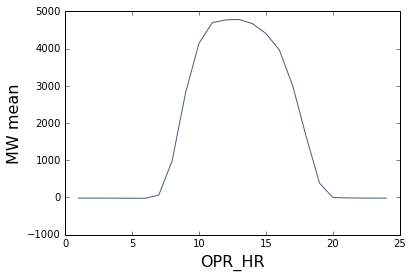

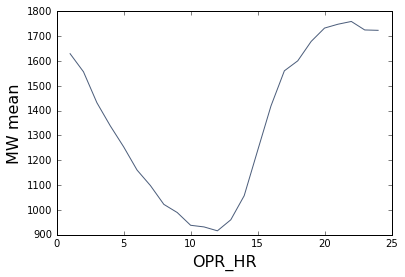

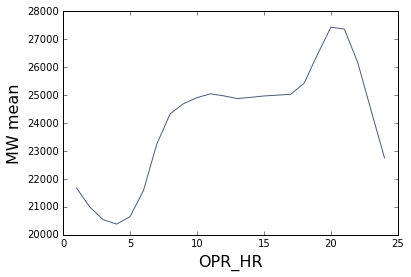

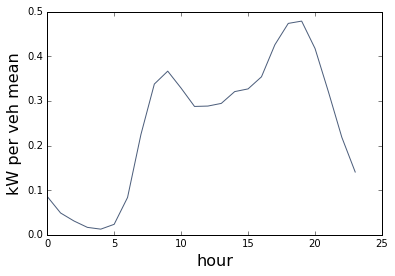

In [5]:
#Your code here

#Answer key
solar_avg_byhour = solar.group('OPR_HR',np.mean)
solar_avg_byhour.plot('OPR_HR', 'MW mean')

wind_avg_byhour = wind.group('OPR_HR',np.mean)
wind_avg_byhour.plot('OPR_HR', 'MW mean')

demand_avg_byhour = ca_energy_demand.group('OPR_HR',np.mean)
demand_avg_byhour.plot('OPR_HR', 'MW mean')

EV_sim = EV_sim.with_column('kW per veh',EV_sim.column('kW')/2220)
EV_avg_byhour = EV_sim.group('hour', np.mean)
EV_avg_byhour.plot('hour', 'kW per veh mean')

## Plot the standard deviation of hourly energy generation and hourly energy demand

**Tasks** <li> Again group by hour, but now save the standard deviation MW. Save results as solar_std_byhour, wind_std_byhour, and demand_std_byhour. <li> Plot the standard deviation of wind generation, solar generation, and consumption vs. hour for the month of March. <li> Plot the standard deviation of EV charging power by hour.

**Question:** <li> Which source - wind or solar, has more variation?


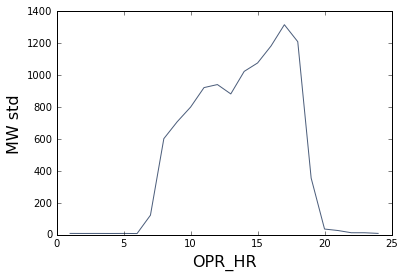

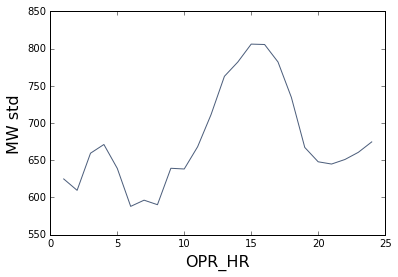

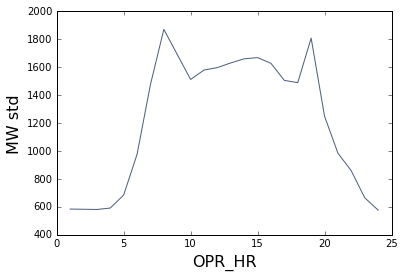

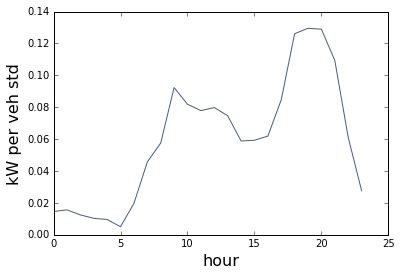

In [6]:
# Your code here

solar_std_byhour = solar.group('OPR_HR',np.std)
solar_std_byhour.plot('OPR_HR', 'MW std')

wind_std_byhour = wind.group('OPR_HR',np.std)
wind_std_byhour.plot('OPR_HR', 'MW std')

demand_std_byhour = ca_energy_demand.group('OPR_HR',np.std)
demand_std_byhour.plot('OPR_HR', 'MW std')

EV_std_byhour = EV_sim.group('hour', np.std)
EV_std_byhour.plot('hour', 'kW per veh std')

## Mean +/- standard deviation
**Task**
1. Plot mean +/- standard devation per hour. (note you will have to use plt.plot to plot both + std and - std in the same graph). Plot solar, wind, and demand each in their own window. Use plt.figure() to creates a new plot window. 

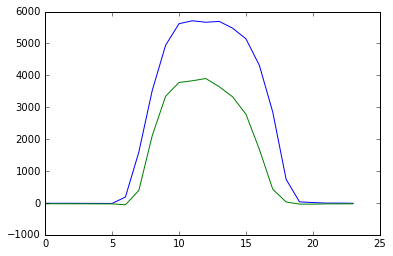

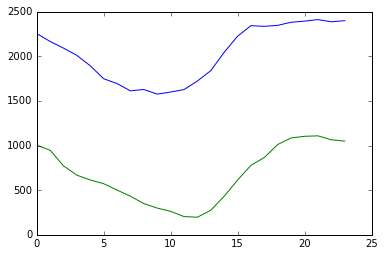

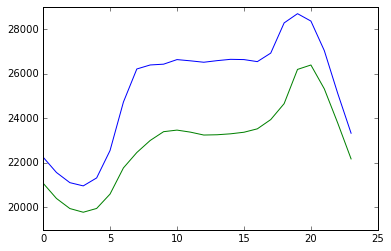

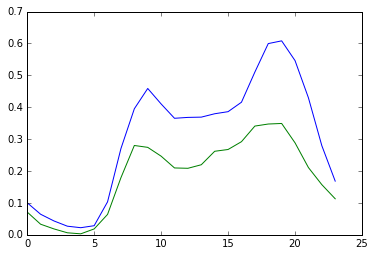

In [7]:
# Your code here

# Answer key
plt.plot(solar_avg_byhour['MW mean']+solar_std_byhour['MW std'])
plt.plot(solar_avg_byhour['MW mean']-solar_std_byhour['MW std'])

plt.figure()
plt.plot(wind_avg_byhour['MW mean']+wind_std_byhour['MW std'])
plt.plot(wind_avg_byhour['MW mean']-wind_std_byhour['MW std'])

plt.figure()
plt.plot(demand_avg_byhour['MW mean']+demand_std_byhour['MW std'])
plt.plot(demand_avg_byhour['MW mean']-demand_std_byhour['MW std'])

plt.figure()
plt.plot(EV_avg_byhour['kW per veh mean']+EV_std_byhour['kW per veh std'])
plt.plot(EV_avg_byhour['kW per veh mean']-EV_std_byhour['kW per veh std'])

## CA energy goals
As mentioned above, CA has a goal of producing 33% renewables by 2020.
**Questions:** 
<li> How are we doing on this goal - how much of our grid's energy came from renewable sources for March 2016?<li> What percentage of renewables comes from wind? what percentage from solar?

In [8]:
# your code/answer here


# Answer key:
percent_renewable = sum(solar.column('MW')+wind.column('MW'))/sum(ca_energy_demand.column('MW'))*100
#0.1257 = percent renewable

percent_solar = sum(solar.column('MW'))/sum(solar.column('MW')+wind.column('MW'))*100
percent_wind = sum(wind.column('MW'))/sum(solar.column('MW')+wind.column('MW'))*100
print ('{0:.2f} percent of energy from March 2016 was generated by renewables.'.format(percent_renewable))
print ('{0:.2f} percent of this was from wind, and {1:.2f} percent was from solar.'.format(percent_solar,percent_wind))

12.57 percent of energy from March 2016 was generated by renewables.
55.32 percent of this was from wind, and 44.68 percent was from solar.


## Energy from non-renewable sources:
**Tasks**<li> Add a column to demand_avg_by_hour called 'non-renewable MW' that contains the average hourly MW that is not satisfied by renewables. <li> Plot the average non-renewable energy requirement vs. hour. 

**Questions** <li> Brifly describe the trend - what hour is the peak, what hour is the minimum, is it relatively flat? <li> Given that the grid does not handle large/rapid fluctuations in energy, do you think reaching the 2020 energy predictions might be problematic? Explain.

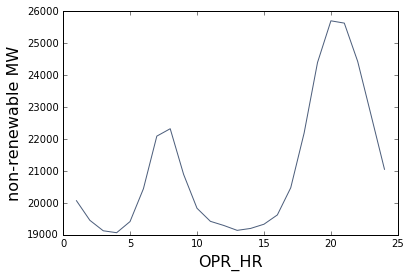

In [9]:
# Your code here

# Answer key 

non_renewables = (demand_avg_byhour.column('MW mean')-
                  solar_avg_byhour.column('MW mean')-
                  wind_avg_byhour.column('MW mean'))
demand_avg_byhour = demand_avg_byhour.with_column('non-renewable MW',non_renewables)
demand_avg_byhour.plot('OPR_HR','non-renewable MW')

In [10]:
# Answer questions here.

# PART 2
## Forecasting EV demand
As mentioned above, CA has a goal of 1.5 million EVs on the road by 2025.

**Tasks:** <li> Create a column in the EV_avg_byhour table called 'MW 2025' containing the hourly demand if we have 1.5 million EVs in CA instead of the 2,220 that are shown in the table. Be careful with units. <li> Plot the 2025 EV demand. <li> Add a new column to the the demand_avg_byhour table called 'MW 2025' where you add the 1.5 million EV charging power consumption to today's demand. <li> Plot the total 2025 demand vs. hour of the day, where 2025 demand = today's demand + 2025 EV demand.


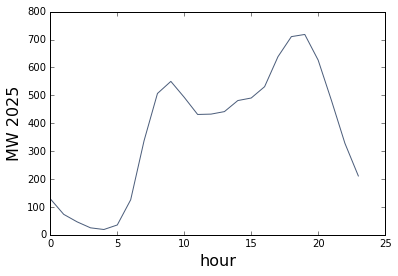

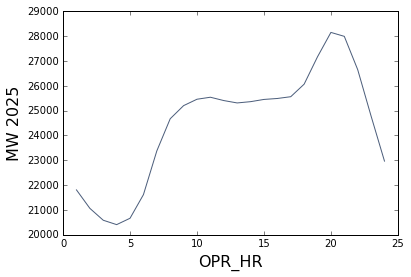

In [11]:
# your code

# Answer key:
EV_avg_byhour = EV_avg_byhour.with_column('MW 2025', EV_avg_byhour['kW per veh mean']*1.5e6/1e3)
EV_avg_byhour.plot('hour','MW 2025')
demand_avg_byhour = demand_avg_byhour.with_column('MW 2025', demand_avg_byhour['MW mean'] + EV_avg_byhour['MW 2025'])

demand_avg_byhour.plot('OPR_HR', 'MW 2025')


## Forecasting renewable generation
CA also has a goal of 33% renewable energy by 2020 and 50% by 2030. Above we discovered that for March 2016 12.5% of energy in CA came from renewables.

**Task:**<li>Let's say that to reach these goals we expect to have 40% renewable energy in 2025. If we keep the same proportion of wind and solar that exists today, by what percentage would we have to scale up the wind and solar generation from what it is today to achieve 40% renewable in 2025? <li>In the wind and solar tables, create columns called 'MW 2025' containing the hourly generation in 2025 if we multiply 'MW' by the scale factor found in the previous question.  


In [12]:
# Your code here

#Answer key
scale_factor = 40/12.5
wind_avg_byhour = wind_avg_byhour.with_column('MW 2025', wind_avg_byhour.column('MW mean')*scale_factor)
solar_avg_byhour = solar_avg_byhour.with_column('MW 2025', solar_avg_byhour.column('MW mean')*scale_factor)

## 2025 Energy from non-renewable sources:
**Tasks**<li> Add a column to demand_avg_by_hour called '2025 non-renewable MW' that contains the average hourly MW demand in 2025 that will not satisfied by our 2025 renewable predictions. <li> Plot the average non-renewable energy requirement vs. hour. 

**Questions** <li> One strategy that has been discussed as a strategy to eliminate the rapid fluctuations in demand on the grid is installing workstation charging stations and encouraging midday charging. After examining the plot of 2025 non-renewable demand, discuss why midday EV charging could help.

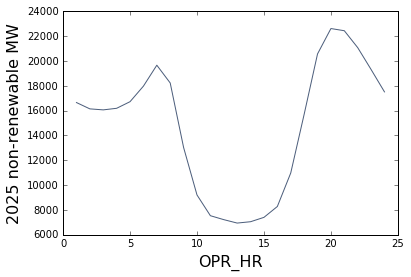

In [13]:
# Your code here
#Answer key
demand_avg_byhour['2025 non-renewable MW']=(demand_avg_byhour['MW 2025']-solar_avg_byhour['MW 2025']-wind_avg_byhour['MW 2025'])
demand_avg_byhour.plot('OPR_HR','2025 non-renewable MW')


In [14]:
# Answer questions here.

